In [1]:
%matplotlib inline

☐ re-visit sources - B1-a, DK Cha, TMC1, WL12, L1455-IRS, L1014, and IRAS03301.
    - aperture failed to converage - TMC1, WL12, L1014, and IRAS03301.
    - aperture too big - B1-a
    - unknown reason - DKCha (31.8), L1455-IRS3 (24.8)

In [2]:
# Source info
obj_list = [['TMC1','1342225803','1342225804','1342250512'],
            ['WL12','1342228187','1342228188','1342251290'],
            ['L1014','1342208911','1342208912','1342245857'],
            ['IRAS03301','1342215668','1342216181','1342249477'],
            ['B1-a','1342216182','1342216183','1342249475'],
            ['DKCha','1342188039','1342188040','1342254037'],
            ['L1455-IRS3','1342204122','1342204123','1342249474']]
# pacsdatadir = '/scratch/CDF_PACS_HSA/'
pacsdatadir = '/Users/yaolun/test/'
# outdir = '/home/bettyjo/yaolun/test/'
outdir = '/Users/yaolun/test/'

15.7337834759
Weighted spectrum saved at  /Users/yaolun/test/DKCha/pacs/data/DKCha_pacs_weighted_hsa_b2a.txt
15.6459977776
Weighted spectrum saved at  /Users/yaolun/test/DKCha/pacs/data/DKCha_pacs_weighted_hsa_r1s.txt
15.6475713432
Weighted spectrum saved at  /Users/yaolun/test/DKCha/pacs/data/DKCha_pacs_weighted_hsa_b2b.txt
15.5598414132
Weighted spectrum saved at  /Users/yaolun/test/DKCha/pacs/data/DKCha_pacs_weighted_hsa_r1l.txt


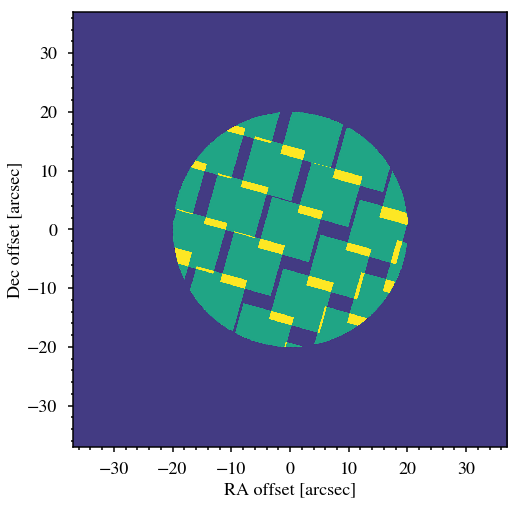

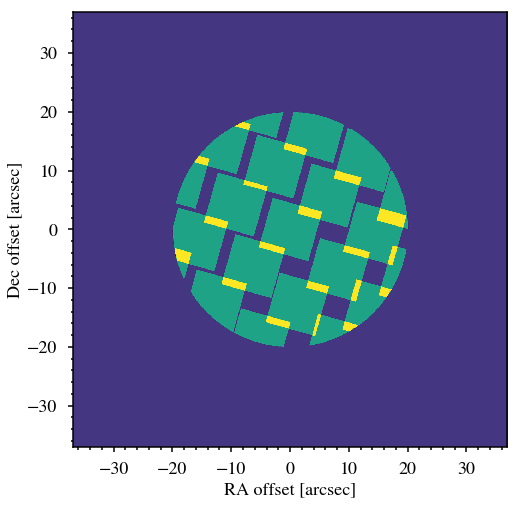

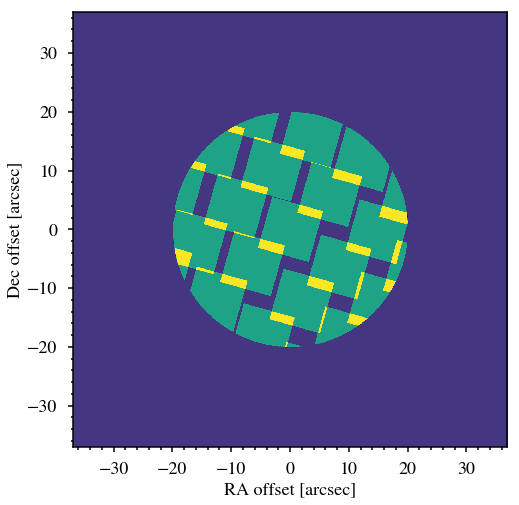

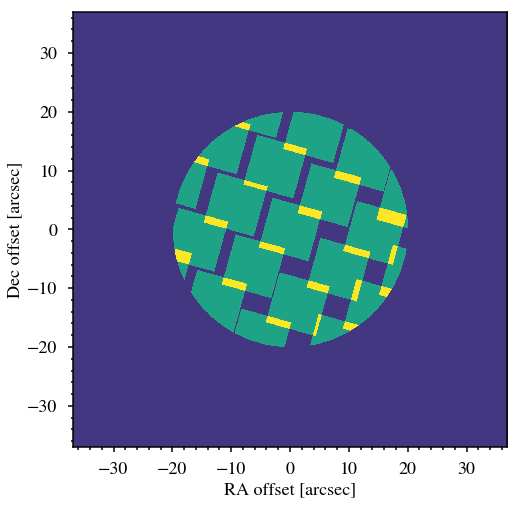

In [5]:
import sys
# sys.path.append('/home/bettyjo/yaolun/programs/line_fitting/')
sys.path.append('/Users/yaolun/programs/line_fitting/')
# from cdfPacs1d import cdfPacs1d
# This is the version without line fitting
from cdfPacs1d_old import cdfPacs1d
o = obj_list[5]
cdfPacs1d(o[1:3], pacsdatadir, outdir+o[0]+'/', o[0], aper_size=40)

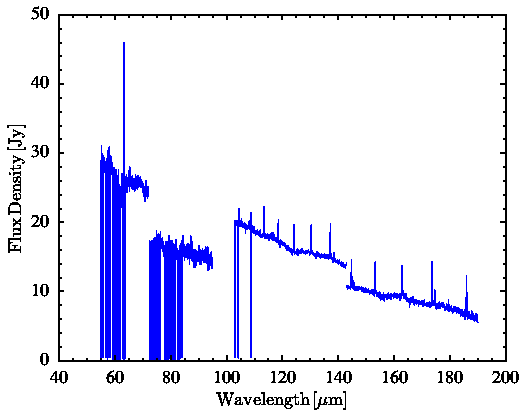

In [6]:
from wand.image import Image as WImage
img = WImage(filename=outdir+o[0]+'/pacs/data/'+o[0]+'_pacs_weighted.pdf')
img

In [9]:
# inspect the pacs cube
o = obj_list[5]
cubefile = [pacsdatadir+o[1]+'/herschel.pacs.signal.PacsRebinnedCube/hpacs'+o[1]+'_20hps3drbs_00.fits',
            pacsdatadir+o[1]+'/herschel.pacs.signal.PacsRebinnedCube/hpacs'+o[1]+'_20hps3drrs_00.fits',
            pacsdatadir+o[2]+'/herschel.pacs.signal.PacsRebinnedCube/hpacs'+o[2]+'_20hps3drbs_00.fits',
            pacsdatadir+o[2]+'/herschel.pacs.signal.PacsRebinnedCube/hpacs'+o[2]+'_20hps3drrs_00.fits']

from astropy.io import fits
import numpy as np
hdulist = fits.open(cubefile[0])

In [11]:
hdulist[1].header

XTENSION= 'IMAGE   '           / Java FITS: Mon Nov 14 16:43:49 CST 2016        
BITPIX  =                  -64                                                  
NAXIS   =                    3 / Dimensionality                                 
NAXIS1  =                    5                                                  
NAXIS2  =                    5                                                  
NAXIS3  =                 1732                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywor

In [12]:
np.shape(hdulist[1].data)

(1732, 5, 5)

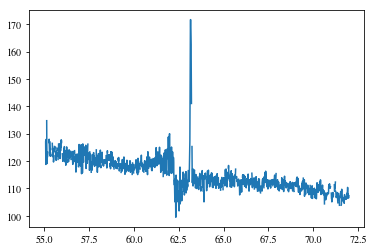

In [16]:
import matplotlib.pyplot as plt
spec = hdulist[1].data[:,2,2]*0
for i in range(1,4):
    for j in range(1,4):
        spec = spec + hdulist[1].data[:,i,j]
plt.plot(hdulist[8].data, spec)